#  Lab: Basic Image Processing With OpenCV  
In this lab, we will learn how to load, display, transform, and analyze images using OpenCV in Python.  
We will perform operations like:
- Reading images  
- Converting BGR to RGB  
- Resizing  
- Grayscale conversion  
- Thresholding  
- Normalizing  
- Flipping & rotating  
- Blurring  
- Flattening images  

These operations are the foundation for Machine Learning & Computer Vision tasks.
Let's get started!


In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully!")


Libraries imported successfully!


##  Upload Image
We need to upload an image so Colab can process it.  
After uploading, we'll check if the file exists and load it safely.


In [9]:
from google.colab import files
uploaded = files.upload()

print("Uploaded files:", uploaded.keys())


Saving Picture1.jpg to Picture1 (1).jpg
Uploaded files: dict_keys(['Picture1 (1).jpg'])


##  Load & Display Image  
OpenCV reads images in **BGR format**, while matplotlib displays them in **RGB**.  
Before converting, we first display the raw BGR image to observe the difference.
We also add a safety check to avoid the "dtype object cannot be converted" error.


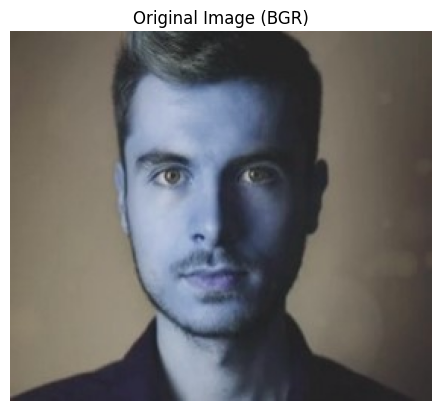

In [10]:
filename = list(uploaded.keys())[0]   # Choose the uploaded image

img = cv2.imread(filename)

if img is None:
    raise ValueError(" Error: Unable to load the image. Please re-upload the file.")

plt.imshow(img)
plt.title("Original Image (BGR)")
plt.axis("off")
plt.show()


##  Convert BGR to RGB  
OpenCV stores images in BGR.  
Matplotlib expects RGB.  
So we convert the color space for proper visualization.


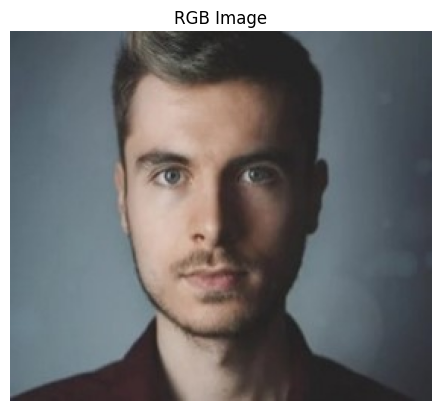

RGB Image Shape: (244, 278, 3)


In [11]:
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.title("RGB Image")
plt.axis("off")
plt.show()

print("RGB Image Shape:", image_rgb.shape)


##  Resize & Convert to Grayscale  
Most ML models require images of equal size.  
We resize the image to **128×128 pixels**.  
Then we convert it to **grayscale**, reducing the image to a single channel.


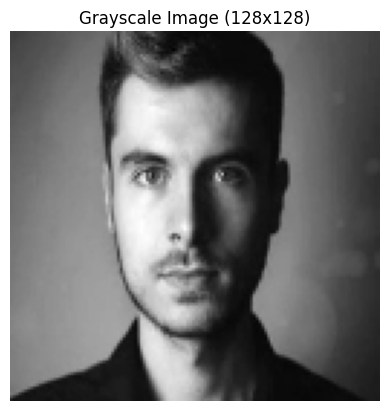

In [12]:
resized_image = cv2.resize(image_rgb, (128, 128))
image_gray = cv2.cvtColor(resized_image, cv2.COLOR_RGB2GRAY)

plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image (128x128)")
plt.axis("off")
plt.show()


##  Thresholding (Binary Image)  
Thresholding helps convert grayscale images to **pure black & white**.  
If a pixel value is **above 127**, it becomes white (255).  
Otherwise, it becomes black (0).


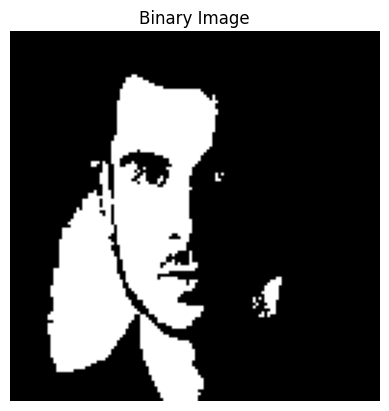

In [13]:
threshold_value = 127
max_value = 255

_, binary_image = cv2.threshold(image_gray, threshold_value, max_value, cv2.THRESH_BINARY)

plt.imshow(binary_image, cmap='gray')
plt.title("Binary Image")
plt.axis("off")
plt.show()


##  Normalization  
ML models often require pixel values between **0 and 1**.  
We divide every pixel by 255 to scale the values.


In [14]:
normalized = image_gray / 255.0

print("Normalized shape:", normalized.shape)
print("Min pixel value:", normalized.min())
print("Max pixel value:", normalized.max())
print("Original Min:", image_gray.min())
print("Original Max:", image_gray.max())


Normalized shape: (128, 128)
Min pixel value: 0.10980392156862745
Max pixel value: 0.8
Original Min: 28
Original Max: 204


##  Image Transformations  
We apply:
- **Horizontal Flip** (mirror)
- **Vertical Flip** (upside-down)
- **Rotation 90°** clockwise
- **Rotation 180°**  
These operations are common in data augmentation.


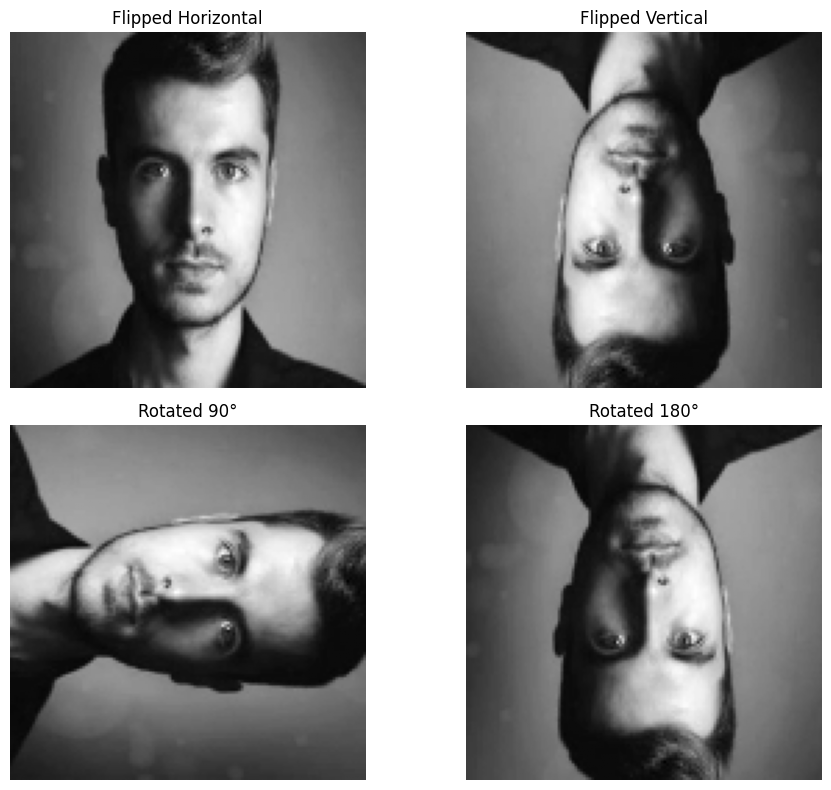

In [15]:
flipped_h = cv2.flip(image_gray, 1)
flipped_v = cv2.flip(image_gray, 0)
rotated_90 = cv2.rotate(image_gray, cv2.ROTATE_90_CLOCKWISE)
rotated_180 = cv2.rotate(image_gray, cv2.ROTATE_180)

# Display
images = [flipped_h, flipped_v, rotated_90, rotated_180]
titles = ["Flipped Horizontal", "Flipped Vertical", "Rotated 90°", "Rotated 180°"]

plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


##  Gaussian Blur  
Gaussian blur smoothens the image and removes noise.  
It uses a **5×5 kernel**, meaning every pixel is averaged with its neighbors.


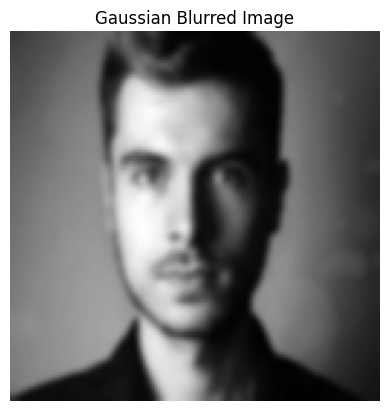

In [16]:
gaussian = cv2.GaussianBlur(image_gray, (5, 5), 0)

plt.imshow(gaussian, cmap='gray')
plt.title("Gaussian Blurred Image")
plt.axis("off")
plt.show()


##  Flattening the Image  
Flattening converts a **2D image (128×128)** into a **1D vector (16384 values)**.  
This is how images are fed into neural networks or stored in datasets.


In [17]:
flattened = image_gray.flatten()

print("Original Shape:", image_gray.shape)
print("Flattened Shape:", flattened.shape)


Original Shape: (128, 128)
Flattened Shape: (16384,)
